**Programming**

In [1]:
import matplotlib.pyplot as plt                 # Importing modules that are needed
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
import torch.nn as nn

In [2]:

df = pd.read_csv('DS__B.csv')
df.head(1310)

,PlateID,Grade,Coating,AnnealTime,CoolingTime,TemperingTime,AnnealType,DuctilityImprove
0,1,3,Yes,22.0,1,0,Spherical,0
1,2,1,No,38.0,1,0,Complete,1
2,3,3,No,26.0,0,0,Spherical,1
3,4,1,No,35.0,1,0,Spherical,1
4,5,3,Yes,35.0,0,0,Spherical,0
...,...,...,...,...,...,...,...,...
1304,1305,3,Yes,NaN,0,0,Spherical,0
1305,1306,1,No,39.0,0,0,Complete,1
1306,1307,3,Yes,38.5,0,0,Spherical,0
1307,1308,3,Yes,NaN,0,0,Spherical,0


### **Determining/ identifying the missing/ null values**

**Programming**

In [3]:
missing_values_count = df.isnull().sum()                # Get the number of missing data points per column
missing_values_count[0:10]

PlateID               0
Grade                 0
Coating               0
AnnealTime          263
CoolingTime           0
TemperingTime         0
AnnealType            2
DuctilityImprove      0
dtype: int64

In [4]:
total_cells = np.product(df.shape)                                # How many total missing values do we have?
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100               # Percentage of data that is missing
print(percent_missing)

2.530557677616501


### **Showing the types there are in the dataset**

In [5]:
df.dtypes                                                         # Shows the types are there in the dataset

PlateID               int64
Grade                 int64
Coating              object
AnnealTime          float64
CoolingTime           int64
TemperingTime         int64
AnnealType           object
DuctilityImprove      int64
dtype: object

### **Data cleaning**

**Removing leading/ trailing whitespaces**

In [6]:
df['AnnealType'] = df['AnnealType'].str.strip()                   # Remove leading/trailing whitespaces

### **Replacing any rows with missing values to statistical mean values**

In [7]:
df.fillna(df.mean(), inplace=True)                                # Replace any rows with missing values to statistical mean values

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_9160\84892724.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)                                # Replace any rows with missing values to statistical mean values


### **Checking if there is any missing data points left**

In [8]:
missing_values_count = df.isnull().sum()                # Get the number of missing data points per column
missing_values_count[0:10]

PlateID             0
Grade               0
Coating             0
AnnealTime          0
CoolingTime         0
TemperingTime       0
AnnealType          2
DuctilityImprove    0
dtype: int64

### **Checking/Retrieving the AnnealType values**

In [9]:
df['AnnealType']

0       Spherical
1        Complete
2       Spherical
3       Spherical
4       Spherical
          ...    
1304    Spherical
1305     Complete
1306    Spherical
1307    Spherical
1308     Complete
Name: AnnealType, Length: 1309, dtype: object

### **Conversion of AnnealTime, TemperingTime and CoolingTime to int values and into minutes**

In [10]:
df['AnnealTime'] = df['AnnealTime'].astype(int) / 60                   # Convert 'AnnealTime' column to integer data type and change its unit to minutes
df['TemperingTime'] = df['TemperingTime'].astype(int) * 60             # Convert 'TemperingTime' column to integer data type and change its unit to minutes
df['CoolingTime'] = df['CoolingTime'].astype(int) * 60                 # Convert 'CoolingTime' column to integer data type and change its unit to minutes

### **Double checking if the values has change to integer type and to minutes**

In [11]:
df.head(6)

,PlateID,Grade,Coating,AnnealTime,CoolingTime,TemperingTime,AnnealType,DuctilityImprove
0,1,3,Yes,0.366667,60,0,Spherical,0
1,2,1,No,0.633333,60,0,Complete,1
2,3,3,No,0.433333,0,0,Spherical,1
3,4,1,No,0.583333,60,0,Spherical,1
4,5,3,Yes,0.583333,0,0,Spherical,0
5,6,3,Yes,0.483333,0,0,Isothermal,0


In [12]:
def one_hot_encode(data):
    # Use pd.get_dummies to one-hot encode the specified columns
    encoded_data = pd.get_dummies(data, columns=['AnnealType', 'Coating'])

    return encoded_data


### **Data cleaning, removing any missing data that are left**

In [13]:
df.dropna(inplace=True)

### **Checking if there is any missing data points left**

In [14]:
missing_values_count = df.isnull().sum()                # Get the number of missing data points per column
missing_values_count[0:10]

PlateID             0
Grade               0
Coating             0
AnnealTime          0
CoolingTime         0
TemperingTime       0
AnnealType          0
DuctilityImprove    0
dtype: int64

### **Graph 1: Annealing type vs annealing time (Line chart)**

**Flowchart**

**Programming**

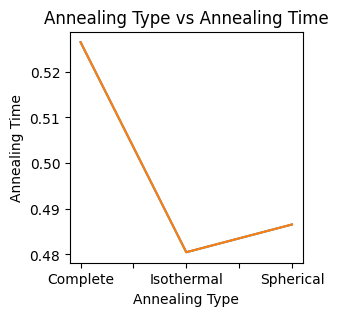

In [15]:
df_grouped = df.groupby('AnnealType')['AnnealTime'].mean()
df_grouped.plot(kind='line', figsize=(3, 3))
df_grouped.plot(kind='line')
plt.xlabel('Annealing Type')
plt.ylabel('Annealing Time')
plt.title('Annealing Type vs Annealing Time')
plt.show()

### **Graph 2 - Annealing type vs ductility improve (Line chart)**

**Programming**

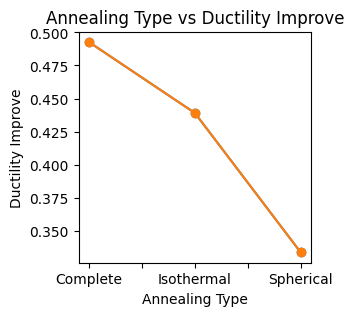

In [16]:
df_grouped_ductility = df.groupby('AnnealType')['DuctilityImprove'].mean()
df_grouped_ductility.plot(kind='line', marker='o', figsize=(3, 3))
df_grouped_ductility.plot(kind='line', marker='o')
plt.xlabel('Annealing Type')
plt.ylabel('Ductility Improve')
plt.title('Annealing Type vs Ductility Improve')
plt.show()

### **Graph 3 - Tempering Time and Cooling Time vs Ductility Improve (Bar chart)**

**Programming**

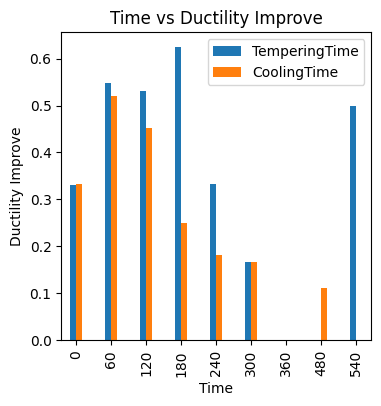

In [17]:
df_grouped_tempering_ductility = df.groupby('TemperingTime')['DuctilityImprove'].mean()
df_grouped_tempering_ductility1 = df.groupby('CoolingTime')['DuctilityImprove'].mean()
df_combined = pd.DataFrame({'TemperingTime': df_grouped_tempering_ductility, 'CoolingTime': df_grouped_tempering_ductility1})    # Combine the two variables into a DataFrame
ax = df_combined.plot(kind='bar', width=0.35, figsize=(4, 4))                                                                    # Plot the DataFrame
plt.xlabel('Time')                                                                                                               # Set labels and title
plt.ylabel('Ductility Improve')
plt.title('Time vs Ductility Improve')
plt.show()                                                                                                                      # Show the plot

**Flowchart**

**Programming**

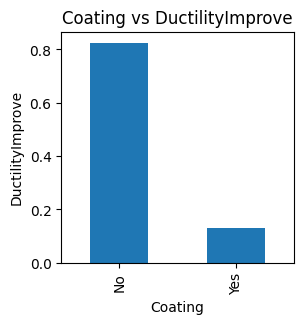

In [18]:
df_grouped_tempering_ductility = df.groupby('Coating')['DuctilityImprove'].mean()
df_grouped_tempering_ductility.plot(kind='bar')
df_grouped_tempering_ductility.plot(kind='bar', figsize=(3, 3))
plt.xlabel('Coating')
plt.ylabel('DuctilityImprove')
plt.title('Coating vs DuctilityImprove')
plt.show()

# Now we shall apply various Machine Learning Techniques

The code `encoded_df = one_hot_encode(df)` is calling a function called `one_hot_encode` and passing the DataFrame `df` as an argument. The function is expected to perform one-hot encoding on the DataFrame and return the encoded DataFrame.


In [19]:
encoded_df = one_hot_encode(df)

print(encoded_df)

      PlateID  Grade  AnnealTime  CoolingTime  TemperingTime  \
0           1      3    0.366667           60              0   
1           2      1    0.633333           60              0   
2           3      3    0.433333            0              0   
3           4      1    0.583333           60              0   
4           5      3    0.583333            0              0   
...       ...    ...         ...          ...            ...   
1304     1305      3    0.483333            0              0   
1305     1306      1    0.650000            0              0   
1306     1307      3    0.633333            0              0   
1307     1308      3    0.483333            0              0   
1308     1309      3    0.483333           60             60   

      DuctilityImprove  AnnealType_Complete  AnnealType_Isothermal  \
0                    0                    0                      0   
1                    1                    1                      0   
2                    

In [20]:
x = encoded_df.iloc[:]
x = x.drop("DuctilityImprove", axis=1)
x = x.drop("PlateID", axis=1)
y = encoded_df["DuctilityImprove"] 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.5, random_state=123)

# We will be performing the following Machine Learning Techniques on two different data splits. The first data split will be `20/80` and the second data split will be `50/50`.

# Random Forest Classifier

The code is training a random forest classifier using the `RandomForestClassifier` class from the scikit-learn library. It is using 100 decision trees (`n_estimators = 100`) to build the random forest.

In [21]:
#For a 80-20 Split
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       164
           1       0.77      0.76      0.76        98

    accuracy                           0.82       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262



The code is training a random forest classifier using the `RandomForestClassifier` class from the scikit-learn library. It is using 100 decision trees (`n_estimators = 100`) to build the random forest.

In [22]:
#For a 50-50 Split
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train2, y_train2)
y_pred = classifier.predict(X_test2)
report = classification_report(y_test2, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       406
           1       0.79      0.73      0.76       248

    accuracy                           0.83       654
   macro avg       0.82      0.81      0.81       654
weighted avg       0.82      0.83      0.82       654



The code is performing hyperparameter optimization for a RandomForestClassifier model using grid search and cross-validation.


In [23]:
# RandomForestClassifier (ensemble learner for the multiclass classification)
parameters = {'n_estimators':[10, 15, 20], 
              'criterion':['gini', 'entropy'],
              'max_features':[9, 'auto'],
              'max_depth':[4, None],
              'class_weight':['balanced']}
# grid search and cross-validation for hyper-parameters optimisation
forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, 
                      cv=3, scoring='neg_log_loss', refit=True, n_jobs=-1) 
forest.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, None], 'max_features': [9, 'auto'],
                         'n_estimators': [10, 15, 20]},
             scoring='neg_log_loss')

In [24]:
best_parameters = forest.best_params_
print("Best parameters: {}".format(forest.best_params_))

Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'max_features': 9, 'n_estimators': 20}


In [25]:
scores = cross_val_score(RandomForestClassifier(**best_parameters), X_train, y_train, cv=5)
print('Average score using 3-fold CV: {:g} +/- {:g}'.format(np.mean(scores), np.std(scores)))

Average score using 3-fold CV: 0.87177 +/- 0.0294015


In [26]:
scores = cross_val_score(RandomForestClassifier(**best_parameters), X_train2, y_train2, cv=5)
print('Average score using 3-fold CV: {:g} +/- {:g}'.format(np.mean(scores), np.std(scores)))

Average score using 3-fold CV: 0.866788 +/- 0.0183111


In [27]:
y_forest = forest.predict(X_test)
print(classification_report(y_test, y_forest))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       164
           1       0.83      0.77      0.80        98

    accuracy                           0.85       262
   macro avg       0.85      0.84      0.84       262
weighted avg       0.85      0.85      0.85       262



In [28]:
y_forest = forest.predict(X_test2)
print(classification_report(y_test2, y_forest))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       406
           1       0.85      0.79      0.82       248

    accuracy                           0.87       654
   macro avg       0.87      0.86      0.86       654
weighted avg       0.87      0.87      0.87       654



# Using A SVM

The code is performing multiclass classification using Support Vector Machines (SVM) and optimizing the hyperparameters using grid search and cross-validation.


In [29]:
# Support Vector Machines for multiclass classification
# grid search and cross-validation for hyper-parameters optimisation
parameters = {'C':[0.1, 1., 10., 100]}
clf = GridSearchCV(estimator=SVC(probability=True, class_weight='balanced'), param_grid=parameters,  # default "rbf" kernel
                   cv=5, scoring='neg_log_loss', refit=True, n_jobs=1)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', probability=True),
             n_jobs=1, param_grid={'C': [0.1, 1.0, 10.0, 100]},
             scoring='neg_log_loss')

The code is performing hyperparameter tuning and cross-validation for a Support Vector Classifier (SVC) model.

In [30]:
best_C = clf.best_params_
scores = cross_val_score(SVC(**best_C, class_weight='balanced'), X_train, y_train, cv=3)
print('Average score using 3-fold CV: {:g} +/- {:g}'.format(np.mean(scores), np.std(scores)))
print(best_C)

Average score using 3-fold CV: 0.850715 +/- 0.00627519
{'C': 100}


In [31]:
y_svm = clf.predict(X_test)
print(classification_report(y_test, y_svm))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       164
           1       0.80      0.73      0.77        98

    accuracy                           0.83       262
   macro avg       0.82      0.81      0.82       262
weighted avg       0.83      0.83      0.83       262



In [32]:
y_svm = clf.predict(X_test2)
print(classification_report(y_test2, y_svm))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       406
           1       0.83      0.77      0.80       248

    accuracy                           0.85       654
   macro avg       0.85      0.84      0.84       654
weighted avg       0.85      0.85      0.85       654



# Logisitic Regression

The code is performing a grid search with cross-validation to find the optimal hyperparameters for a logistic regression model.


In [33]:
# Grid-search with cross validation for optimal model hyper-parameters
parameters = {'C':[0.01, 0.1, 1., 10., 50., 100.], 
              'multi_class':['multinomial'], 
              'solver':['newton-cg'],
              'class_weight':['balanced']}
lreg = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters,
                    cv=2, scoring='neg_log_loss', refit=True, n_jobs=1) # refit=True returns the best model
lreg.fit(X_train, y_train)
# Best value of hyper-parameter "C"
best_c = lreg.best_params_['C']
print('Best value: C = {:g}'.format(best_c))

Best value: C = 10


The code snippet is performing cross-validation to estimate the average classification accuracy of a logistic regression model.


In [34]:
# Average classification accuracy with cross validation
#lreg = LogisticRegression(C=best_c, solver='newton-cg', multi_class='multinomial')
scores = cross_val_score(LogisticRegression(C=best_c, multi_class='multinomial', 
                                            solver='newton-cg', class_weight='balanced'), 
                         X_train, y_train, cv=3)  # it doesn't return a model
print('Score using 3-fold CV: {:g} +/- {:g}'.format(np.mean(scores), np.std(scores)))

Score using 3-fold CV: 0.849765 +/- 0.00667073


In [35]:
# Multinomial Logistic Regression (with fixed hyper-parameters)
lreg = LogisticRegression(C=10, solver='newton-cg', multi_class='multinomial', class_weight='balanced')  # fixed "C"
lreg.fit(X_train, y_train)  # fit model to data
y_lr = lreg.predict(X_test)  # predict on new data

In [36]:
print(classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       164
           1       0.79      0.78      0.78        98

    accuracy                           0.84       262
   macro avg       0.83      0.83      0.83       262
weighted avg       0.84      0.84      0.84       262



The code is performing multinomial logistic regression with fixed hyperparameters.


In [37]:
# Multinomial Logistic Regression (with fixed hyper-parameters)
lreg = LogisticRegression(C=10, solver='newton-cg', multi_class='multinomial', class_weight='balanced')  # fixed "C"
lreg.fit(X_train2, y_train2)  # fit model to data
y_lr = lreg.predict(X_test2)  # predict on new data

In [38]:
print(classification_report(y_test2, y_lr))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       406
           1       0.81      0.79      0.80       248

    accuracy                           0.85       654
   macro avg       0.84      0.84      0.84       654
weighted avg       0.85      0.85      0.85       654



# kNN (k Nearest Neighbours)

The code is performing k-nearest neighbors classification on a dataset.


In [39]:
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
report_knn = classification_report(y_test, y_pred)
print(report_knn)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       164
           1       0.87      0.69      0.77        98

    accuracy                           0.85       262
   macro avg       0.85      0.82      0.83       262
weighted avg       0.85      0.85      0.84       262



The code is performing k-nearest neighbors classification.


In [40]:
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train2, y_train2)
y_pred = knn_classifier.predict(X_test2)
report_knn = classification_report(y_test2, y_pred)
print(report_knn)

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       406
           1       0.84      0.65      0.73       248

    accuracy                           0.82       654
   macro avg       0.83      0.79      0.80       654
weighted avg       0.82      0.82      0.81       654



The code is performing a grid search to find the optimal number of neighbors (k) for a K-Nearest Neighbors (KNN) classifier for the `20/80` data split.


In [41]:
# Define the range of values for k
param_grid = {'n_neighbors': range(1, 21)}  # You can adjust the range as needed

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Create a GridSearchCV object to search for the best k
grid_search = GridSearchCV(knn_classifier, param_grid, cv=50, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameter (k)
best_k = grid_search.best_params_['n_neighbors']

# Print the best k
print("Optimal number of neighbors (k):", best_k)

# Train the KNN classifier with the best k
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = best_knn_classifier.predict(X_test)

# Evaluate the classifier
from sklearn.metrics import classification_report
report_knn = classification_report(y_test, y_pred)
print(report_knn)

Optimal number of neighbors (k): 7
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       164
           1       0.83      0.72      0.77        98

    accuracy                           0.84       262
   macro avg       0.84      0.82      0.82       262
weighted avg       0.84      0.84      0.84       262



The code is performing a grid search to find the optimal number of neighbors (k) for a K-Nearest Neighbors (KNN) classifier for the `50/50` data split.

In [42]:
# Define the range of values for k
param_grid = {'n_neighbors': range(1, 21)}  # You can adjust the range as needed

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Create a GridSearchCV object to search for the best k
grid_search = GridSearchCV(knn_classifier, param_grid, cv=50, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train2, y_train2)

# Get the best parameter (k)
best_k = grid_search.best_params_['n_neighbors']

# Print the best k
print("Optimal number of neighbors (k):", best_k)

# Train the KNN classifier with the best k
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train2, y_train2)

# Make predictions
y_pred = best_knn_classifier.predict(X_test2)

# Evaluate the classifier
from sklearn.metrics import classification_report
report_knn = classification_report(y_test2, y_pred)
print(report_knn)

Optimal number of neighbors (k): 8
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       406
           1       0.82      0.68      0.74       248

    accuracy                           0.82       654
   macro avg       0.82      0.80      0.80       654
weighted avg       0.82      0.82      0.82       654

